# Chapter 8

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
# Assignment: ASSIGNMENT Week-7 ( chap08ex.ipynb)
# Name: Bezawada, Sashidhar
# Date: 2022-10-15

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib

import brfss

import numpy as np

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [3]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [4]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.37003995378410204
rmse median 0.44727203721922837


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [5]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [6]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.1487933186657535
mean error unbiased -0.006925538443379071


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [7]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

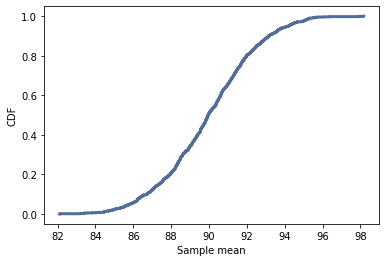

In [8]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [9]:
np.mean(xbars)

89.97662421279989

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [10]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.81305884072577, 94.16485591127089)

And the RMSE of the sample means is called the standard error.

In [11]:
stderr = RMSE(xbars, 90)
stderr

2.475631950236355

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [12]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.1509807985607778
rmse Lm 1.6916087368399704
mean error L 0.3851629850544791
mean error Lm 0.48563210960011527


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [17]:
# Assignment: ASSIGNMENT Week-7 ( Exercise 8-1 )
# Name: Bezawada, Sashidhar
# Date: 2022-10-15

import random

#Similar experiments for median
def Estimate4(n=7, iters=10000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('mean error x bar',MeanError(means,mu))
    print('mean error median',MeanError(medians,mu))
    
Estimate4()

mean error x bar -0.007523099358259236
mean error median -0.007701645968278861


In [18]:
import random

#Similar experiments for median
def Estimate5(n=7, iters=100000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('mean error x bar',MeanError(means,mu))
    print('mean error median',MeanError(medians,mu))
    
Estimate5()
    

mean error x bar 0.0011215262660457328
mean error median 0.0011775304614657517


In [19]:
def Estimate6(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('RMSE sigma**2 biased', RMSE(estimates1, sigma**2))
    print('RMSE sigma**2 unbiased', RMSE(estimates2, sigma**2))
    
Estimate6()

RMSE sigma**2 biased 0.542829010934545
RMSE sigma**2 unbiased 0.6138015159973776


In [20]:
def Estimate7(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('RMSE sigma**2 biased', RMSE(estimates1, sigma**2))
    print('RMSE sigma**2 unbiased', RMSE(estimates2, sigma**2))
    
Estimate7()

RMSE sigma**2 biased 0.5129383023652971
RMSE sigma**2 unbiased 0.5743600023794786


For running similar experiments to see if x-bar and the median are biased estimates of mu, they are both relatively close to zero at 10000 iterations. As the number of estimations increases, the mean errors of the estimates gets closer to zero, which means that they are more likely to be non-biased estimates of mu.

For checking if the biased estimator of sigma^2 or the unbiased estimated of sigma^2 yields a lower RMSE, it turns out that the biased estimator has a lower RMSE value by about .60. Therefore, the biased estimator should be off from the actual result a little less than the unbiased estimator. This difference persists as the number of estimations increases as well!



**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



Standard Error 0.7537350287528277
90% CI (1.4229704653541557, 3.1269896178747603)


(10, 0.7537350287528277)

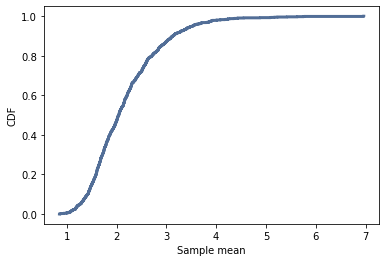

In [21]:
# Assignment: ASSIGNMENT Week-7 ( Exercise 8-2 )
# Name: Bezawada, Sashidhar
# Date: 2022-10-15

def n10(n=10, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    cdf = thinkstats2.MakeCdfFromList(means)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')
    ci = cdf.Percentile(10),cdf.Percentile(90)
    stderr = RMSE(means,lam)

    print('Standard Error',stderr)
    print('90% CI',ci)
    
    return n,stderr
    
    
n10()

Standard Error 0.5378670707509242
90% CI (1.5364268899629372, 2.814646184383043)


(20, 0.5378670707509242)

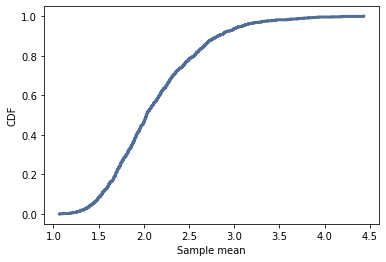

In [22]:
def n20(n=20, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    cdf = thinkstats2.MakeCdfFromList(means)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')
    ci = cdf.Percentile(10),cdf.Percentile(90)
    stderr = RMSE(means,lam)

    print('Standard Error',stderr)
    print('90% CI',ci)
    
    return n,stderr
    
    
n20()

Standard Error 0.39328756573144547
90% CI (1.610726118276334, 2.5956247583509215)


(30, 0.39328756573144547)

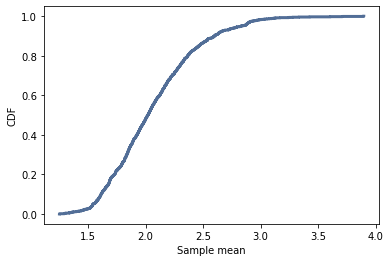

In [23]:
def n30(n=30, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    cdf = thinkstats2.MakeCdfFromList(means)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')
    ci = cdf.Percentile(10),cdf.Percentile(90)
    stderr = RMSE(means,lam)

    print('Standard Error',stderr)
    print('90% CI',ci)
    
    return n,stderr
    
    
n30()

Text(0, 0.5, 'standard errors')

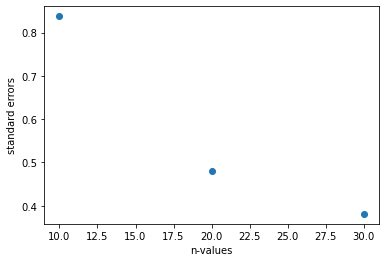

In [24]:
#Plotting standard error versus n
n = [10,20,30]
stderr = [0.8376440805823729,0.4811277342924511,0.38100153549922156]

matplotlib.pyplot.scatter(n,stderr)
matplotlib.pyplot.xlabel("n-values")
matplotlib.pyplot.ylabel("standard errors")

For sample size n = 10:

  1. Standard error: 0.84
  2. 90% Confidence Interval: 90% CI (1.4005182670189151, 3.2367489560721068)

As the sample size increased by 10 units (10,20,30), the standard error continued to decrease and the confidence interval started to narrow in range, giving more certainty around the reliability of our lam estimate (estimate L). Also, all of the confidence intervals contain our lam value of 2.0.

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [28]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

Experiment 4
rmse L 1.4134500344900771
mean error L -0.000787


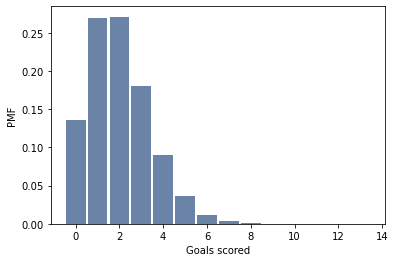

In [29]:
# Solution

# The following function simulates many games, then uses the
# number of goals scored as an estimate of the true long-term
# goal-scoring rate.

def Estimate11(lam=2, m=1000000):

    estimates = []
    for i in range(m):
        L = SimulateGame(lam)
        estimates.append(L)

    print('Experiment 4')
    print('rmse L', RMSE(estimates, lam))
    print('mean error L', MeanError(estimates, lam))
    
    pmf = thinkstats2.Pmf(estimates)
    thinkplot.Hist(pmf)
    thinkplot.Config(xlabel='Goals scored', ylabel='PMF')
    
Estimate11()


My conclusions:

1) RMSE for this way of estimating lambda is 1.4

2) The mean error is small and decreases with m, so this estimator
   appears to be unbiased.

One note: If the time between goals is exponential, the distribution of goals scored in a game is Poisson.

See https://en.wikipedia.org/wiki/Poisson_distribution